# Load Package

# Linear Regression Model

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [51]:
path = 'Reorgnized_RB.csv'
Russell_data = pd.read_csv(path)

In [52]:
for col in Russell_data.columns:
    print(col)

Opponent
Min
FGM
FGA
FG%
3PM
3PA
3P%
FTM
FTA
FT%
OREB
DREB
REB
AST
STL
BLK
TOV
PF
PTS
+/-
Year
Team score
Opponent score
date
Season
Lose
Win
Friday
Monday
Saturday
Sunday
Thursday
Tuesday
Wednesday
HOU
LAC
LAL
OKC
WAS
Playoff
Regular


In [53]:
y = Russell_data["PTS"]
features = Russell_data.drop(columns=["PTS"])
features

,Opponent,Min,FGM,FGA,FG%,3PM,3PA,3P%,FTM,FTA,...,Thursday,Tuesday,Wednesday,HOU,LAC,LAL,OKC,WAS,Playoff,Regular
0,MIL,22.0,4.0,9.0,44.4,1.0,2.0,50.0,4.0,6.0,...,0,0,1,0,0,0,1,0,0,1
1,HOU,19.0,2.0,7.0,28.6,0.0,1.0,0.0,2.0,2.0,...,0,0,0,0,0,0,1,0,0,1
2,MIN,25.0,6.0,13.0,46.2,0.0,1.0,0.0,2.0,3.0,...,0,0,0,0,0,0,1,0,0,1
3,BOS,19.0,4.0,13.0,30.8,3.0,5.0,60.0,2.0,2.0,...,0,0,1,0,0,0,1,0,0,1
4,UTA,17.0,1.0,8.0,12.5,0.0,0.0,0.0,4.0,4.0,...,0,0,0,0,0,0,1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1249,MEM,16.0,5.0,11.0,45.5,1.0,3.0,33.3,1.0,3.0,...,0,0,0,0,1,0,0,0,0,1
1250,MIN,29.0,3.0,8.0,37.5,2.0,2.0,100.0,4.0,5.0,...,0,0,0,0,1,0,0,0,0,1
1251,OKC,22.0,4.0,8.0,50.0,0.0,3.0,0.0,3.0,4.0,...,0,1,0,0,1,0,0,0,0,1
1252,BKN,31.0,10.0,16.0,62.5,1.0,2.0,50.0,2.0,4.0,...,0,0,0,0,1,0,0,0,0,1


Split data into train, validate, and test sets

In [54]:
from sklearn.model_selection import train_test_split


train_data, val_and_test_data = train_test_split(Russell_data, test_size=0.3)
val_data, test_data = train_test_split(val_and_test_data, test_size=0.5)

Plot the relatinship between points and minutes play

Text(0, 0.5, 'PTS')

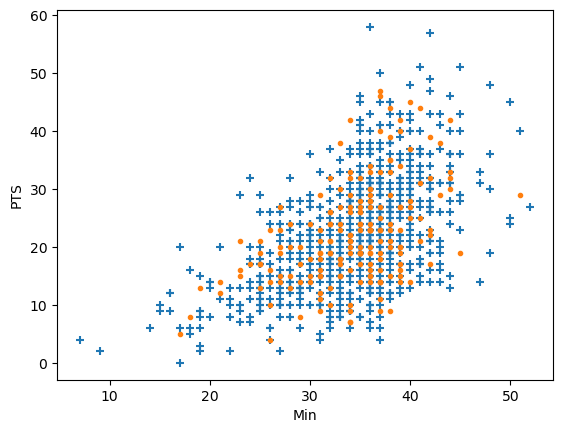

In [55]:
plt.scatter(train_data["Min"], train_data["PTS"], marker="+", label="Train")
plt.scatter(val_data["Min"], val_data["PTS"], marker=".", label="Validate")

plt.xlabel("Min")
plt.ylabel("PTS")

Decide basic feature

In [56]:
basic_featrue = ["Min","AST","STL","BLK",'FG%', '+/-',"Lose", "Win"]

advanced_feature = [
    #"Team",
    #"Opponent",
    "Min",
    "FGM",
    "FGA",
    "FG%",
    "3PM",
    "3PA",
    "3P%",
    "FTM",
    "FTA",
    "FT%",
    "OREB",
    "DREB",
    "REB",
    "AST",
    "STL",
    "BLK",
    "TOV",
    "PF",
    "+/-",
    #"Year",
    #"Win/Lose",
    "Team score",
    #"DayOfWeek",
    #"date",
    "Season",
    #"Game Type"
]

Create linear regression model

In [57]:
from sklearn.linear_model import LinearRegression

basic_model = LinearRegression().fit(train_data[basic_featrue], train_data["PTS"])
advanced_model = LinearRegression().fit(train_data[advanced_feature], train_data['PTS'])


KeyError: "['FGM_square', 'FGM_sqrt', 'FGA_square', 'FTM_sqrt'] not in index"

# Calculate RMSE 

RMSE= sqrt(MSE)


Train dataset

In [ ]:
from sklearn.metrics import mean_squared_error

basic_pred_train = basic_model.predict(train_data[basic_featrue])
basic_rmse_train = np.sqrt(mean_squared_error(train_data["PTS"],basic_pred_train))

advanced_pred_train = advanced_model.predict(train_data[advanced_feature])
advanced_rmse_train = np.sqrt(mean_squared_error(train_data["PTS"], advanced_pred_train))


Validate dataset

In [ ]:
basic_pred_val = basic_model.predict(val_data[basic_featrue])
basic_rmse_val = np.sqrt(mean_squared_error(val_data["PTS"], basic_pred_val))

advanced_pred_val = advanced_model.predict(val_data[advanced_feature])
advanced_rmse_val = np.sqrt(mean_squared_error(val_data['PTS'], advanced_pred_val))

Test dataset

In [ ]:
basic_pred_test = basic_model.predict(test_data[basic_featrue])
basic_rmse_test = np.sqrt(mean_squared_error(test_data["PTS"], basic_pred_test))

advanced_pred_test = advanced_model.predict(test_data[advanced_feature])
advanced_rmse_test = np.sqrt(mean_squared_error(test_data['PTS'], advanced_pred_test))

In [ ]:
print(advanced_rmse_train, advanced_rmse_val, advanced_rmse_test)

print(basic_rmse_train,basic_rmse_val, basic_rmse_test)


2.8846470077588676e-14 2.958135472425733e-14 2.812863636348257e-14
6.3264781050849255 6.143737613262608 6.623162285510631


In [ ]:
mean = np.mean(train_data["PTS"])
std_dev = np.std(train_data["PTS"])
print(mean, std_dev)

21.830102622576966 9.128981085341092
